## Erdos-Renyのランダムネットワークを生成して，基本的なネットワーク指標を計算します。

In [2]:
import collections
import itertools
import pandas as pd
from scipy.special import comb
import networkx as nx
import numpy as np

import matplotlib.pyplot as plt
import sys
sys.path.append("../")
from utils import plot_degree_distribution, get_maxdegree, gnp_random_connected_graph

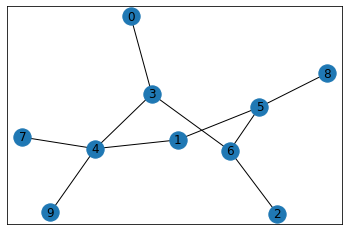

In [2]:
G = nx.fast_gnp_random_graph(10, 0.2)
nx.draw_networkx(G)

### 次数分布

In [4]:
def f(k, N, p):
    """
    二項分布から計算される次数分布の理論式 式(3.2)
    """
    return comb(N-1, k) * pow(p, k) * pow((1-p), N-1-k)

In [10]:
G = nx.fast_gnp_random_graph(1000, 0.005)
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cnt = np.array(cnt) / 1000
max_deg = max(degree_sequence)
lines = [f(k, 1000, 0.005) for k in range(max_deg+1)[::-1]]

[Text(11.4, 0, '11'),
 Text(10.4, 0, '10'),
 Text(9.4, 0, '9'),
 Text(8.4, 0, '8'),
 Text(7.4, 0, '7'),
 Text(6.4, 0, '6'),
 Text(5.4, 0, '5'),
 Text(4.4, 0, '4'),
 Text(3.4, 0, '3'),
 Text(2.4, 0, '2'),
 Text(1.4, 0, '1'),
 Text(0.4, 0, '0')]

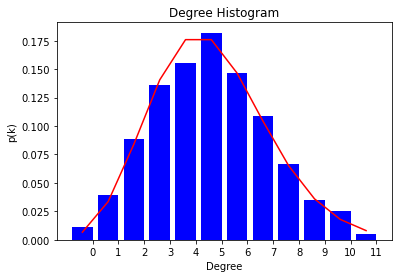

In [11]:
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")
plt.plot(deg, lines, color="r")

plt.title("Degree Histogram")
plt.ylabel("p(k)")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)


### 最短経路長 & 平均クラスタ係数
https://stackoverflow.com/questions/65157955/the-mean-distance-of-the-nodes-increases-by-log-of-the-number-of-nodes-python


In [13]:
from itertools import combinations, groupby
import random
from numpy import array

def gnp_random_connected_graph(n, p):
    """
    Generates a random undirected graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted
    """
    edges = combinations(range(n), 2)
    G = nx.Graph()
    G.add_nodes_from(range(n))
    if p <= 0:
        return G
    if p >= 1:
        return nx.complete_graph(n, create_using=G)
    for _, node_edges in groupby(edges, key=lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < p:
                G.add_edge(*e)
    return G

In [17]:
k_ave = 4
d_ave = []
c_ave = []
N_seq = range(500, 10000, 500)

Graph_list = []

for N in N_seq:
    mean_distance = []
    g = gnp_random_connected_graph(N, k_ave/(N-1))
    Graph_list.append(g)

    d_ave.append(nx.average_shortest_path_length(g))
    c_ave.append(nx.average_clustering(g))



Text(0.5, 0, 'N')

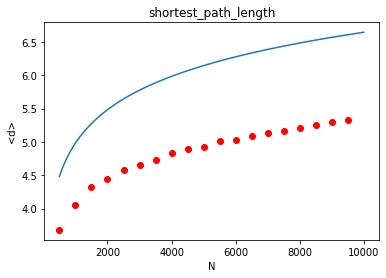

In [23]:
plt.plot(N_seq, d_ave, 'ro')

# 理論式 3.4
f = [np.log(x)/np.log(k_ave) for x in range(500, 10000)]
plt.plot(range(500, 10000), f)
plt.title("shortest_path_length")
plt.ylabel("<d>")
plt.xlabel("N")
plt.show()

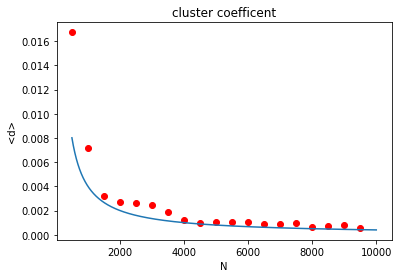

In [26]:
plt.plot(N_seq, c_ave, 'ro')

# 理論式 3.6
f = [k_ave/(x-1) for x in range(500, 10000)]
plt.plot(range(500, 10000), f)
plt.title("cluster coefficent")
plt.ylabel("<d>")
plt.xlabel("N")
plt.show()

## 現実の生物ネットワークと Erdos–Renyi のランダムネットワークの次数分布の比較
### 大腸菌のタンパク質相互作用ネットワークの読み込み

In [131]:
def f(k, N, p):
    """
    二項分布から計算される次数分布の理論式 式(3.2)
    """
    return comb(N-1, k) * pow(p, k) * pow((1-p), N-1-k)

In [34]:
df = pd.read_csv("../data/ecoli_ppi_Hu_etal_2009.txt", header=None,names=["source", "target"], sep=" ")
g = nx.from_pandas_edgelist(df)

In [56]:
Gcc = sorted(nx.connected_components(g), key=len, reverse=True)
G = g.subgraph(Gcc[0])

In [59]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cnt = np.array(cnt) / df.shape[0]
max_deg = max(degree_sequence)

In [130]:
N, K = G.order(), G.size()
avg_deg = float(2 * K) / N
p = float(avg_deg) / (N-1)

lines = [f(k, N, p) for k in range(max_deg+1)[::-1]]

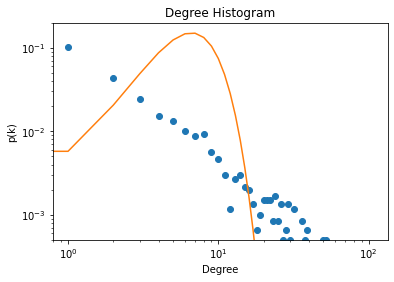

In [143]:
plt.plot(deg, cnt, 'o')
plt.plot(range(max_deg+1)[::-1], lines)

plt.title("Degree Histogram")
plt.ylabel("p(k)")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
plt.ylim(5e-4, 2e-1)
plt.yscale("log")
plt.xscale("log")

## 現実の生物ネットワークと Erdos–Renyi のランダムネットワークの平均最短経路長と平均クラスタ係数の比較

In [165]:
files = [
           "ecoli_regDB5.txt",
           "protein_structure_1A6N_A.txt",
           "protein_structure_1BKS_A.txt",
           "protein_structure_2VIK_A.txt",
           "ecoli_ppi_Hu_etal_2009.txt",
           "yeast_ppi_Batada_etal_2006.txt",
           "human_ppi_hippie_v2.2.txt",
           "metabolic_ecoli.txt",
           "metabolic_yeast.txt",
           "metabolic_human.txt",
           "human_structural_brain_network_Ardesch_2019.txt",
           "human_functional_brain_network_1000_Functional_Connectomes.txt",
           "marine_food_web_pnas_102_15_5443_01562.txt",
           "terrestrial_food_web_caribbean.txt"
]

df_dict = {
    "Network": [],
    "N": [],
    "<k>": [],
    "d_ave": [],
    "d_ave_ER": [],
    "C_ave": [],
    "C_ave_ER": [],
}

for file in files:
    print("load file:", file)
    d = pd.read_csv("../data/" + file, header=None,names=["source", "target"], sep="\t| ", engine='python')
    g = nx.from_pandas_edgelist(d)
    Gcc = sorted(nx.connected_components(g), key=len, reverse=True)
    G = g.subgraph(Gcc[0])

    N, K = G.order(), G.size()

    k_ave = float(2 * K) / N
    d_ave = nx.average_shortest_path_length(G)
    c_ave = nx.average_clustering(G)

    df_dict["Network"].append(file)
    df_dict["N"].append(N)
    df_dict["<k>"].append(k_ave)
    df_dict["d_ave"].append(d_ave)
    df_dict["d_ave_ER"].append(np.log(N)/np.log(k_ave))
    df_dict["C_ave"].append(c_ave)
    df_dict["C_ave_ER"].append(k_ave / (N-1))
    




load file: ecoli_regDB5.txt
load file: protein_structure_1A6N_A.txt
load file: protein_structure_1BKS_A.txt
load file: protein_structure_2VIK_A.txt
load file: ecoli_ppi_Hu_etal_2009.txt
load file: yeast_ppi_Batada_etal_2006.txt
load file: metabolic_ecoli.txt
load file: metabolic_yeast.txt
load file: metabolic_human.txt
load file: human_structural_brain_network_Ardesch_2019.txt
load file: human_functional_brain_network_1000_Functional_Connectomes.txt
load file: marine_food_web_pnas_102_15_5443_01562.txt
load file: terrestrial_food_web_caribbean.txt


In [166]:
df = pd.DataFrame(df_dict)

In [167]:
df

,Network,N,<k>,d_ave,d_ave_ER,C_ave,C_ave_ER
0,ecoli_regDB5.txt,1202,4.788686,3.596242,4.527831,0.259694,0.003987
1,protein_structure_1A6N_A.txt,151,11.178808,4.021104,2.078392,0.569764,0.074525
2,protein_structure_1BKS_A.txt,255,12.086275,4.409943,2.223558,0.537606,0.047584
3,protein_structure_2VIK_A.txt,126,11.777778,3.417905,1.961014,0.564999,0.094222
4,ecoli_ppi_Hu_etal_2009.txt,1673,7.106993,4.147419,3.784841,0.081639,0.004251
5,yeast_ppi_Batada_etal_2006.txt,2752,6.611192,4.901739,4.193263,0.286368,0.002403
6,metabolic_ecoli.txt,879,2.616610,8.866386,7.047437,0.060302,0.002980
7,metabolic_yeast.txt,670,2.620896,9.715280,6.753679,0.063138,0.003918
8,metabolic_human.txt,1029,2.532556,13.874029,7.464621,0.065207,0.002464
9,human_structural_brain_network_Ardesch_2019.txt,72,15.527778,2.065336,1.559330,0.593857,0.218701
